## Decision Tree Classifier

In [156]:
# Import the necessary libraries
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, f1_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns

In [157]:
# Disables Python warnings
warnings.filterwarnings('ignore')

In [158]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df

,orderid,Customer Name,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,preparationtime,orderdate,shipdate
0,2,Ruben Dartt,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,4,2014-09-05,2014-09-09
1,4,Liz Pelletier,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,1,2016-05-30,2016-05-31
2,5,Liz Pelletier,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,7,2013-12-31,2014-01-07
3,6,Liz Pelletier,First Class,359.058,3,0.30,-35.9058,Home Office,Central,Illinois,Bookcases ...,Furniture,3,2014-03-24,2014-03-27
4,9,Sample Company A,Standard Class,290.666,2,0.15,27.3568,Corporate,West,California,Bookcases ...,Furniture,4,2013-05-26,2013-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,9988,Theresa Swint,Standard Class,470.376,3,0.20,52.9173,Consumer,West,California,Phones ...,Technology,4,2016-07-14,2016-07-18
7691,9990,Max Jones,First Class,1097.544,7,0.20,123.4737,Corporate,Central,Texas,Phones ...,Technology,2,2015-12-09,2015-12-11
7692,9992,Kristina Nunn,Standard Class,235.188,2,0.40,-43.1178,Corporate,East,Ohio,Phones ...,Technology,5,2014-01-12,2014-01-17
7693,9993,Sean Miller,First Class,391.980,2,0.00,113.6742,Consumer,East,Delaware,Phones ...,Technology,2,2016-09-22,2016-09-24


In [159]:
# Selects the features that will be used in the model
X = df[['shipmode', 'segment', 'quantity', 'sales', 'profit', 'discount', 'preparationtime']]

# Converts Categorical data into indicator values (Boolean in this case)
X = pd.get_dummies(X, columns=['shipmode', 'segment'])

original_feature_names = X.columns

In [160]:
# Selects the encoded values in 'category' as the target variables that ill be used in the model
y = df['category']

In [161]:
# Splits the features and variables into training and testing data
# 25% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [162]:
# Initialises the Decision Tree Classifier, ensuring that the maximum deoth is 2
tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [163]:
# Makes predictions using the training and test data and prints accuracy score
y_test_pred_tree = tree_model.predict(X_test)
y_train_pred_tree = tree_model.predict(X_train)

In [164]:
# Calculates the training score, test score, and accuracy score rounding them to 3 significant figures
train_score_tree = tree_model.score(X_train, y_train)
test_score_tree = tree_model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_test_pred_tree)

print('Decision Tree Classifier Evaluation:\n')
print('Training Score: {:.3f}'.format(train_score_tree))
print('Test Score: {:.3f}'.format(test_score_tree))
print('Accuracy Score: {:.3f}'.format(accuracy))

Decision Tree Classifier Evaluation:

Training Score: 0.673
Test Score: 0.693
Accuracy Score: 0.693


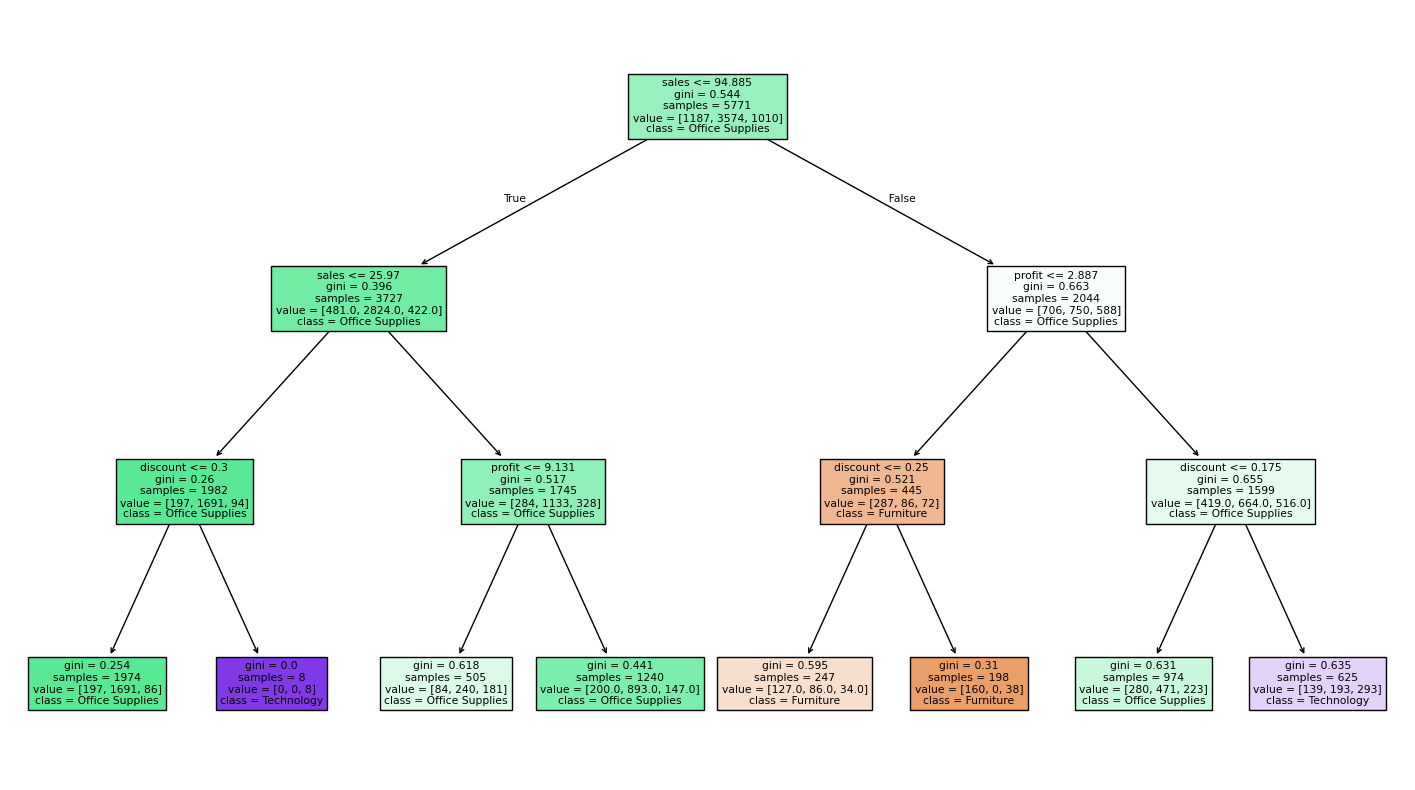

In [165]:
# Visualises the decision tree model
plt.figure(figsize=(18, 10))
plot_tree(tree_model, filled=True, feature_names=original_feature_names, class_names=tree_model.classes_)
plt.show()

Multilabel Confusion Matrix

In [166]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the test predictions to the original
mcm = multilabel_confusion_matrix(y_test, y_test_pred_tree)

tn = mcm[:, 0, 0] # True Negative
tp = mcm[:, 1, 1] # True Positive
fn = mcm[:, 1, 0] # False Negative
fp = mcm[:, 0, 1] # False Positive

In [167]:
# Prints out the Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[1480   53]
  [ 287  104]]

 [[ 310  410]
  [  87 1117]]

 [[1468  127]
  [ 216  113]]]


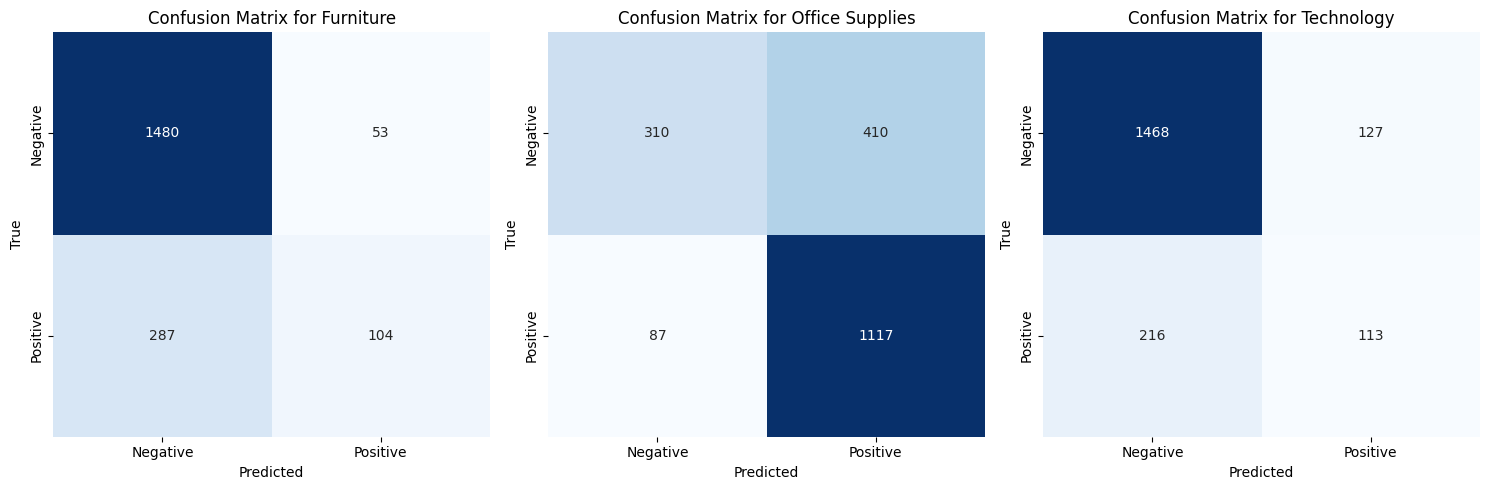

In [168]:
# Plots the multilabel confusion matrix
num_classes = len(y.unique())
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), y.unique())):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [169]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred_tree, average=None)
precision = precision_score(y_test, y_test_pred_tree, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.26598465 0.92774086 0.34346505]
True Negative Rate is:  [0.96542727 0.43055556 0.92037618]
F1 Score is:            [0.37956204 0.81801538 0.39718805]
Precision Score is:     0.6215844626865049


In [170]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the test predictions to the original
mcm = multilabel_confusion_matrix(y_train, y_train_pred_tree)

tn = mcm[:, 0, 0] # True Negative
tp = mcm[:, 1, 1] # True Positive
fn = mcm[:, 1, 0] # False Negative
fp = mcm[:, 0, 1] # False Positive

In [171]:
# Prints out the Confusion and Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[4426  158]
  [ 900  287]]

 [[ 799 1398]
  [ 279 3295]]

 [[4429  332]
  [ 709  301]]]


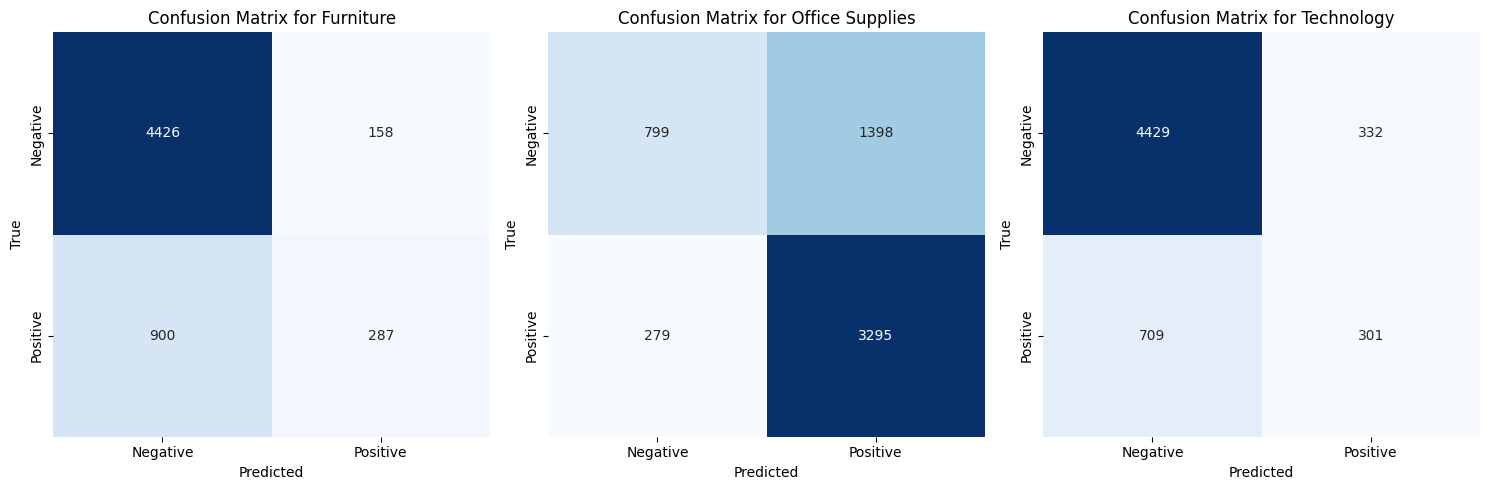

In [172]:
# Plots the multilabel confusion matrix
num_classes = len(y.unique())
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), y.unique())):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [173]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_train, y_train_pred_tree, average=None)
precision = precision_score(y_train, y_train_pred_tree, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.24178602 0.92193621 0.2980198 ]
True Negative Rate is:  [0.96553229 0.36367774 0.93026675]
F1 Score is:            [0.35171569 0.79714528 0.36640292]
Precision Score is:     0.6075222577229962


Model Tuning (Grid Search)

In [174]:
# Sets up the GridSearchCV, defines the parameter grid, and trains it
param_grid = {
    'max_depth': [1, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=0)

grid_search_tree = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [175]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = grid_search_tree.best_params_
best_model = grid_search_tree.best_estimator_

y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy Score: 0.715


Model Tuning (Randomized Search)

In [176]:
# Sets up the RandomizedSearchCV, defines the parameter distribution, and trains it
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=0)

randomized_search_tree = RandomizedSearchCV(tree, param_dist, cv=5, n_iter=100, n_jobs=-1, verbose=1, random_state=0)
randomized_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EC65BABC10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EC651DD410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EC63B98810>},
                   random_state=0, verbose=1)

In [177]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = randomized_search_tree.best_params_
best_model = randomized_search_tree.best_estimator_

y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 14}
Accuracy Score: 0.721
